139
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\angelina_jolie.json


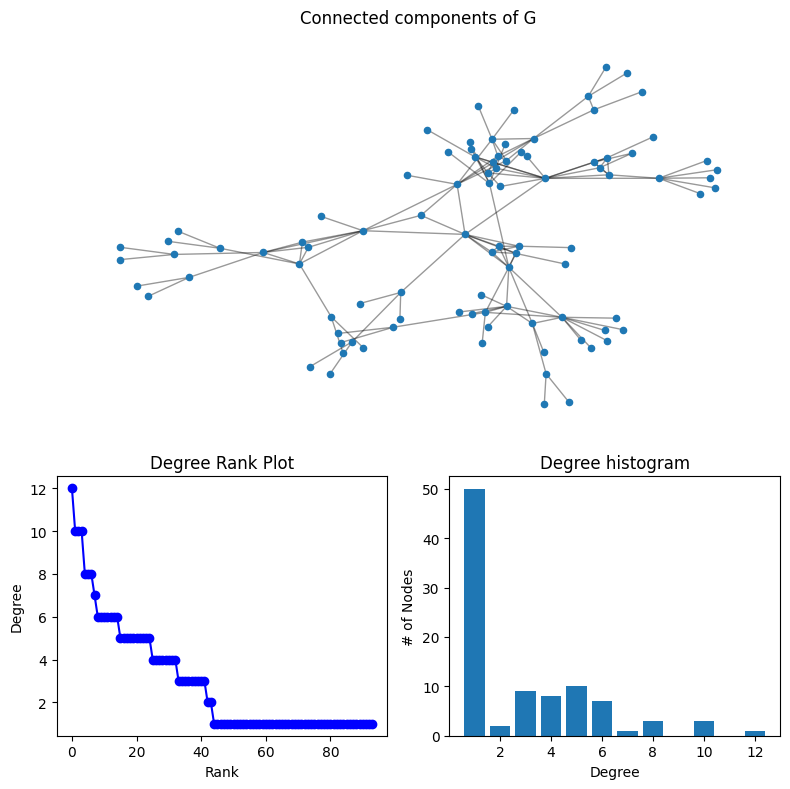

64
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\beyonce.json


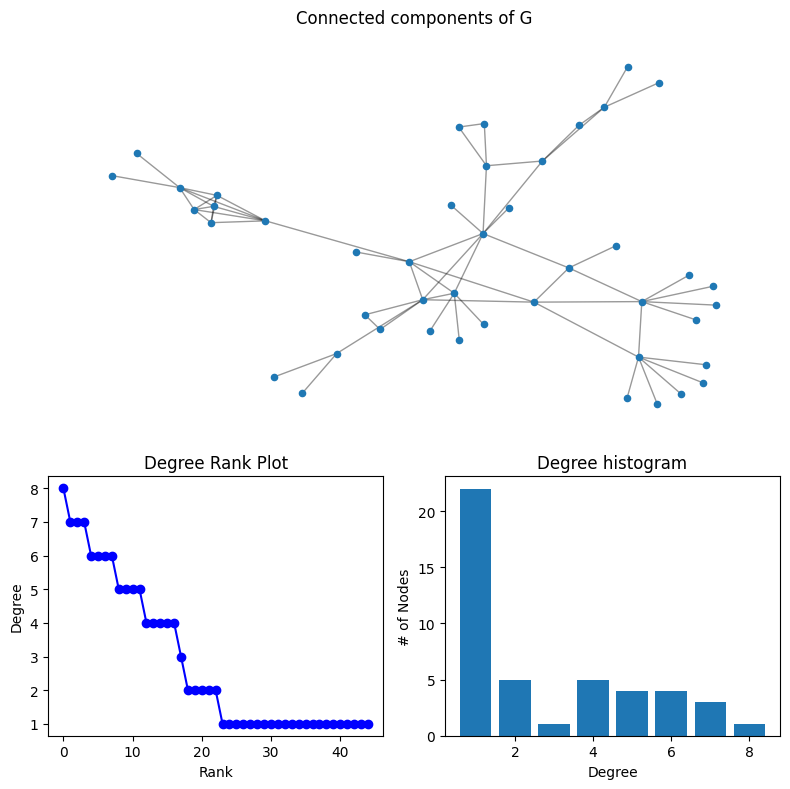

96
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\blake_lively.json


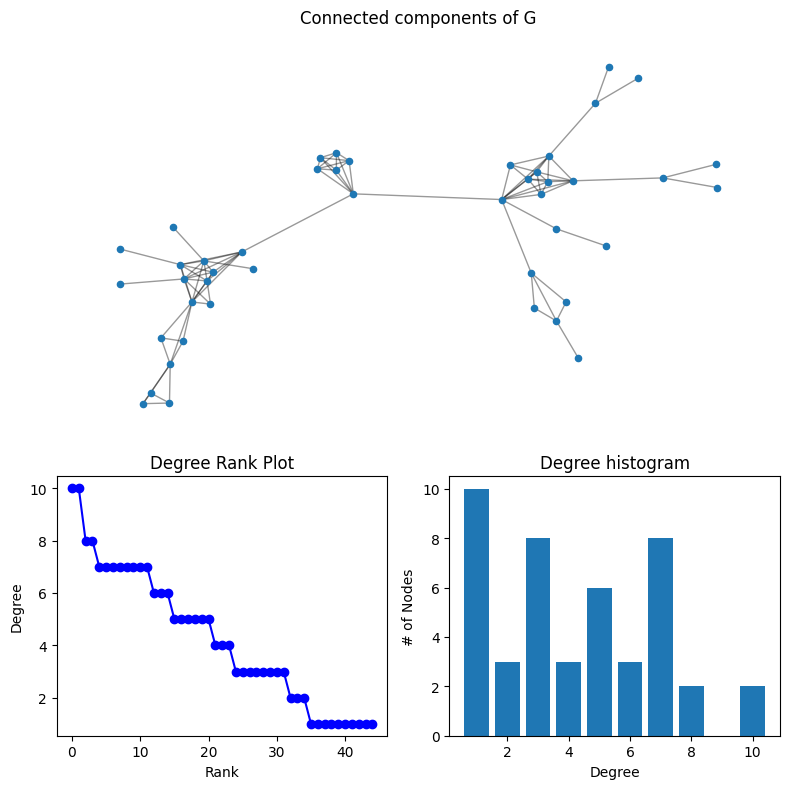

11
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\edyta_gorniak.json


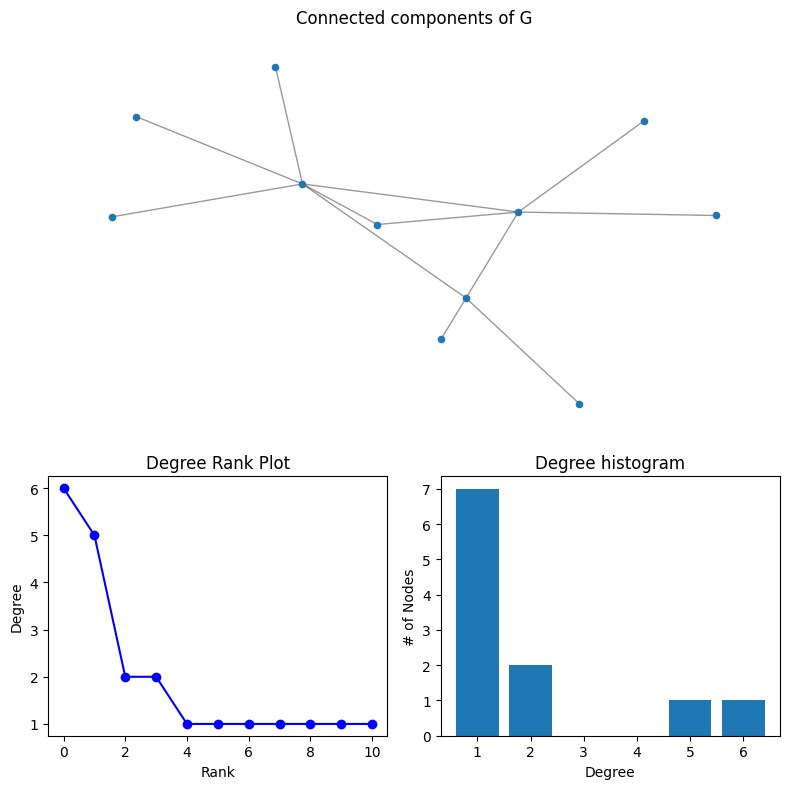

24
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\jenna_ortega.json


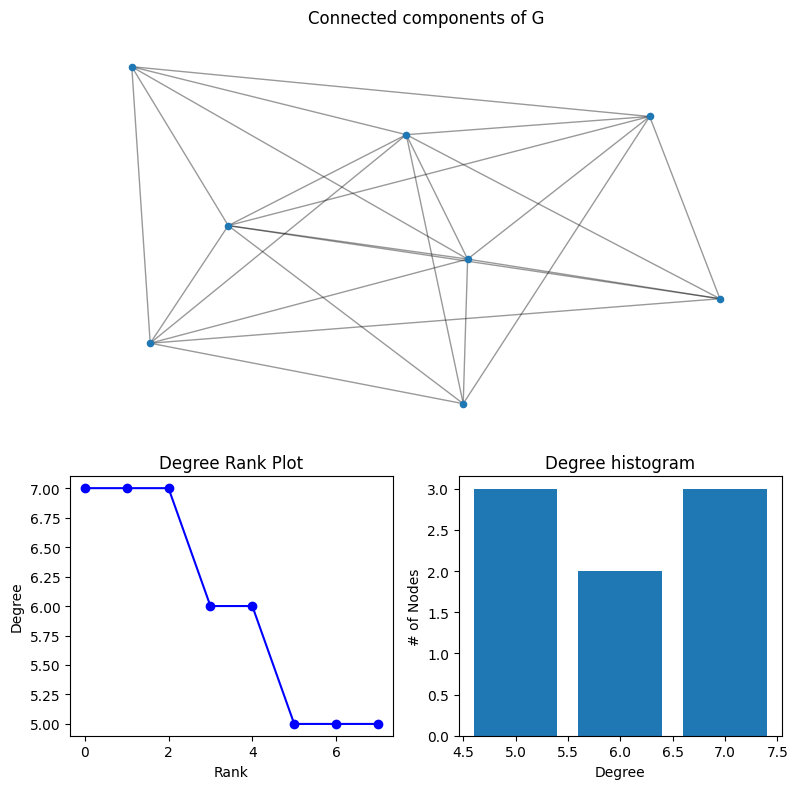

12
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\jerzy_stuhr.json


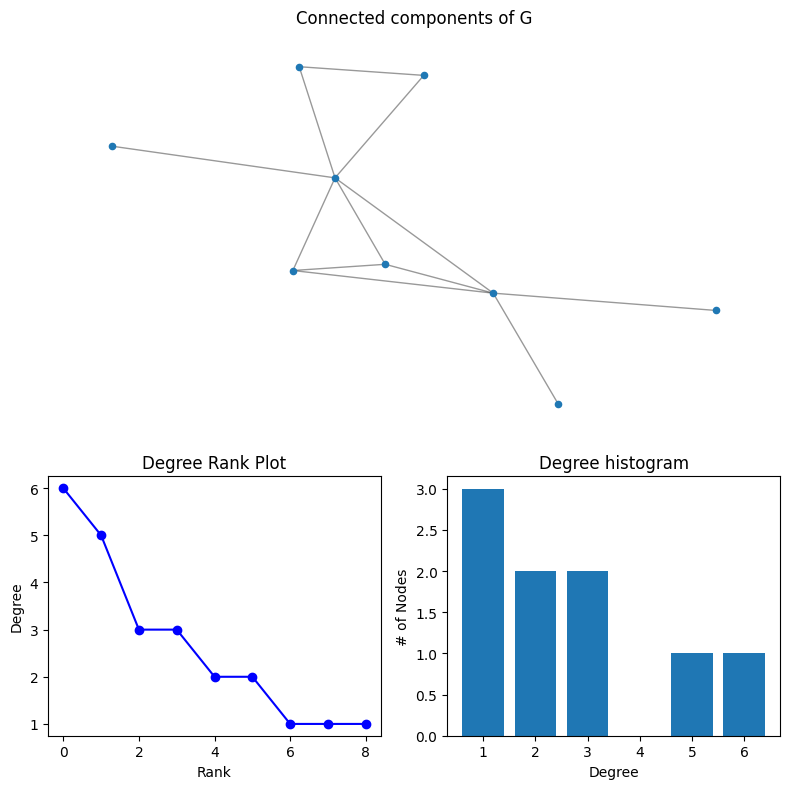

203
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\johnny_depp.json


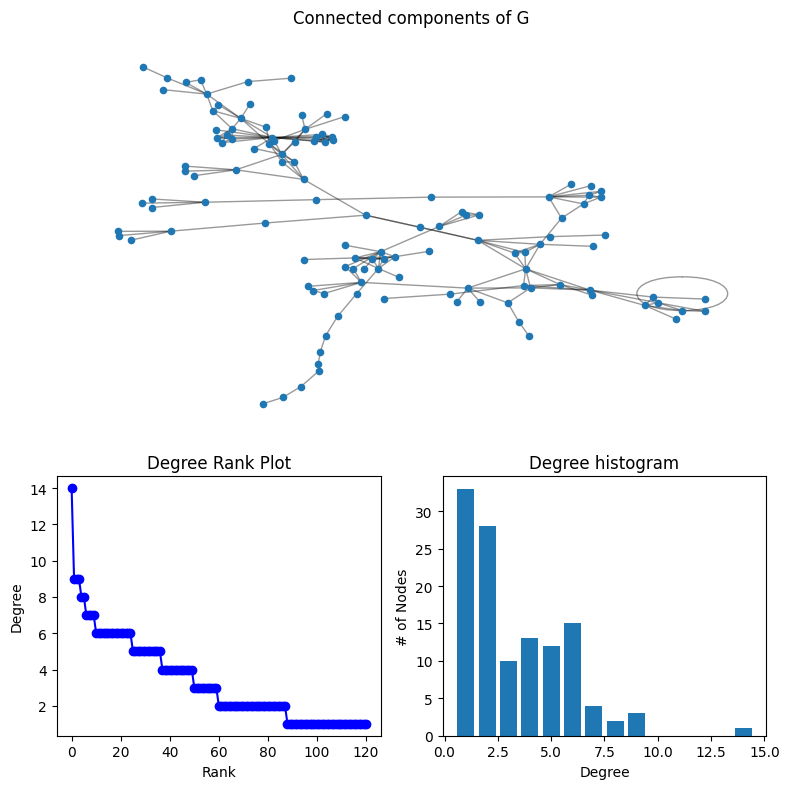

250
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\kim_kardashian.json


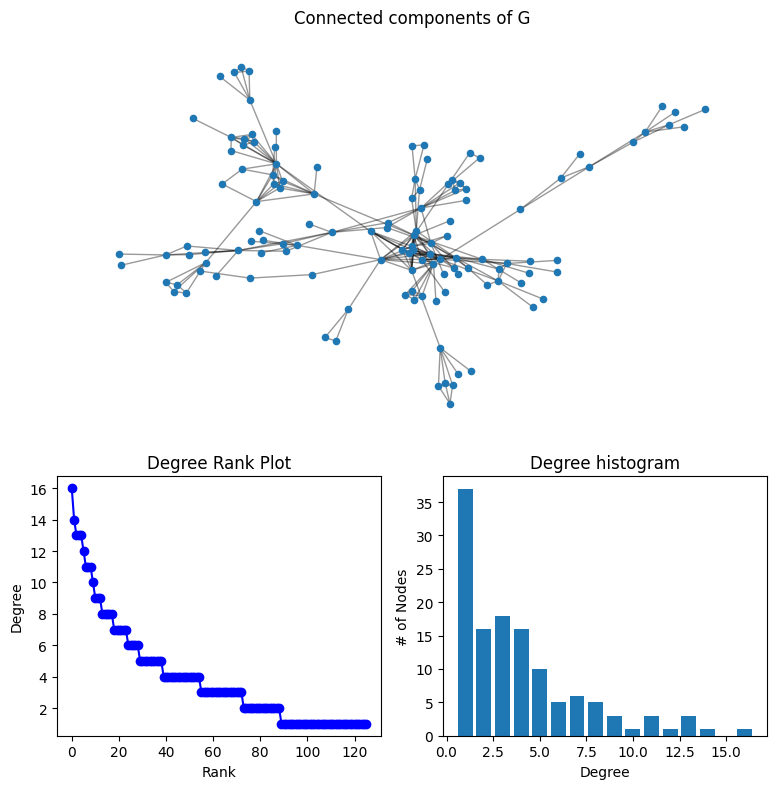

22
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\louis_de_funes.json


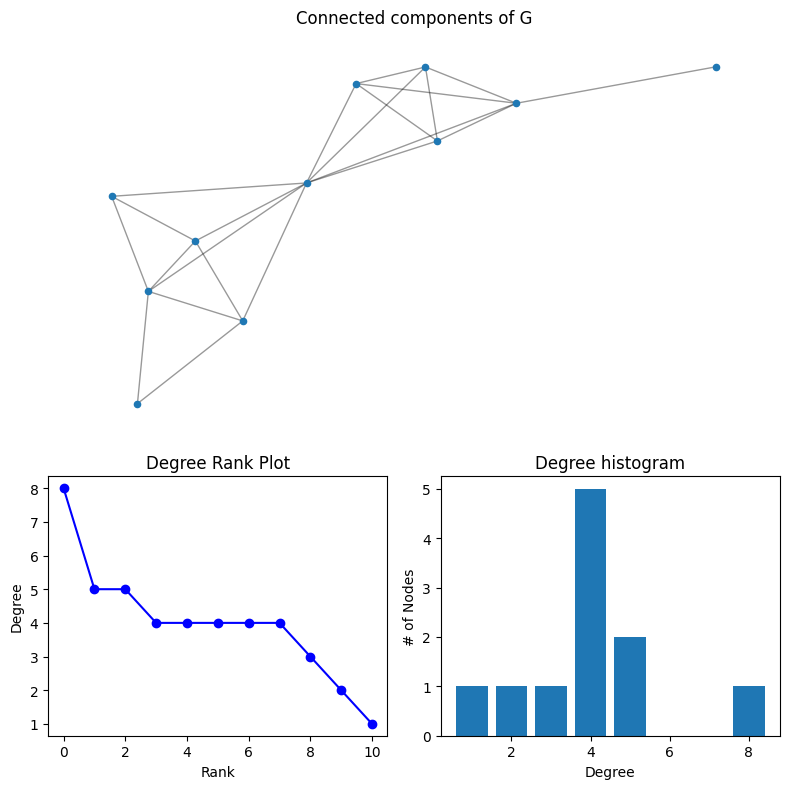

17
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\małgorzata_kozuchowska.json


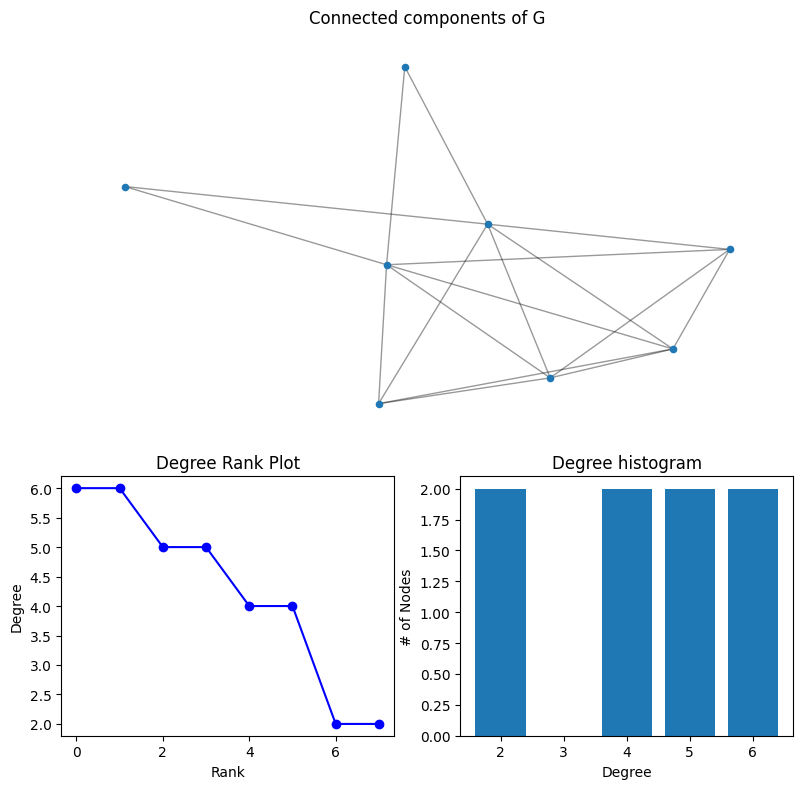

90
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\miley_cyrus.json


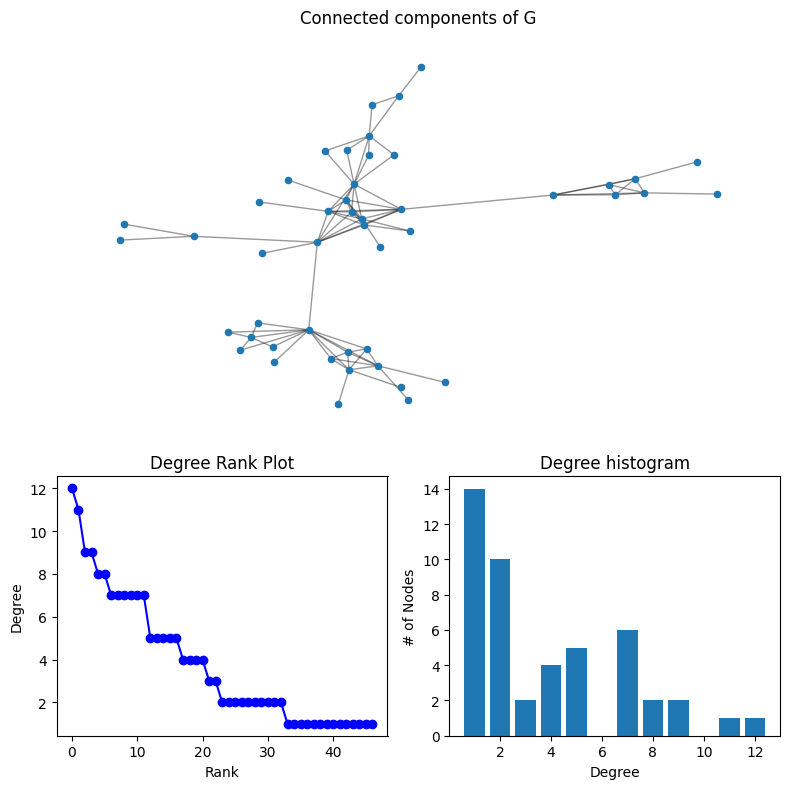

9
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\omar_sy.json


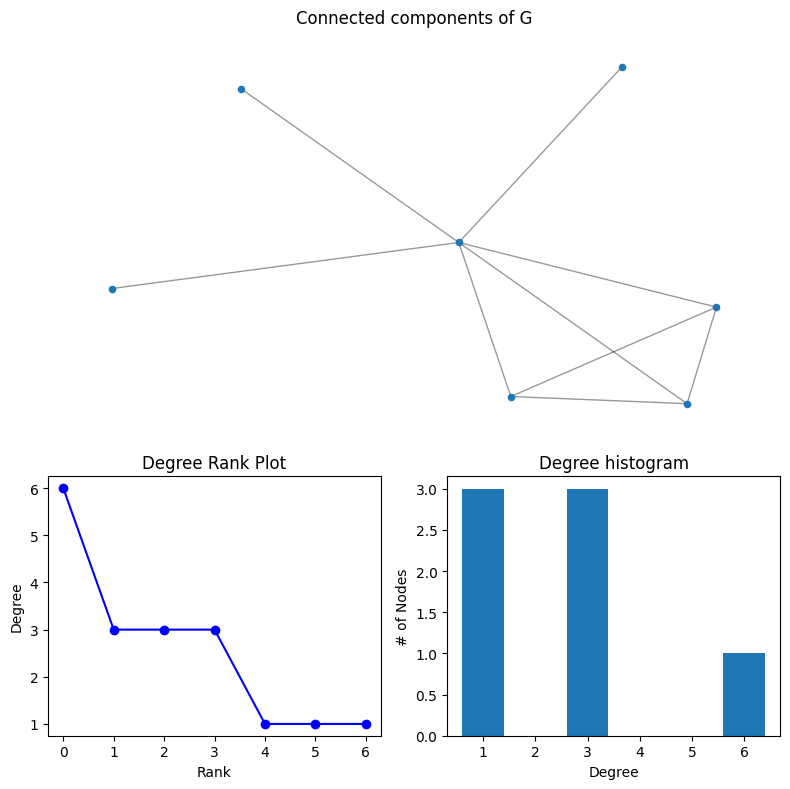

96
C:\Users\tom19\VScode_Projects\Sieci zlozone\gwiazdy_json\ryan_reynolds.json


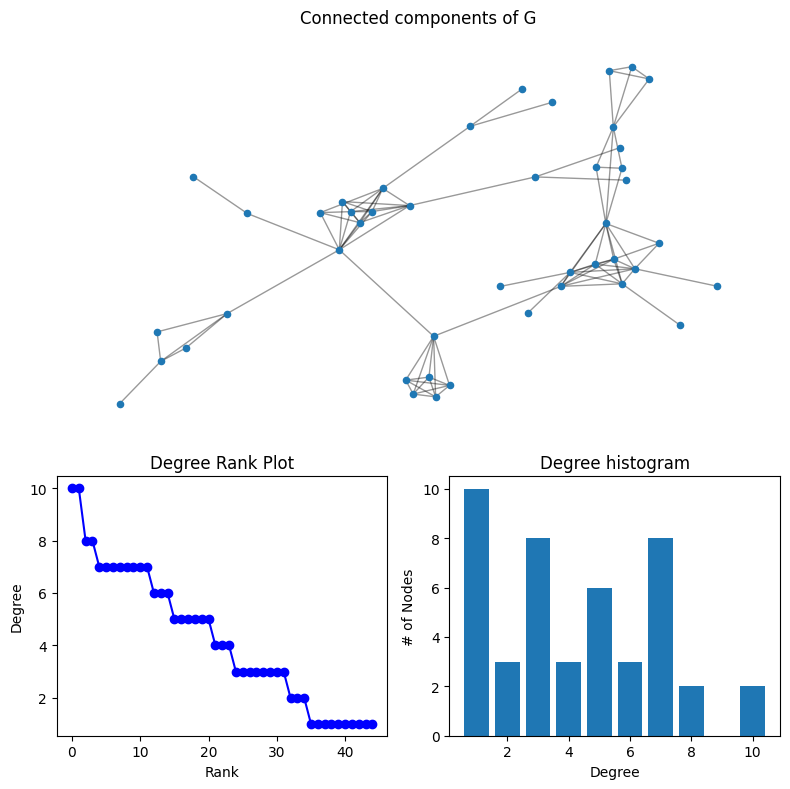

[['angelina_jolie.json', 139], ['beyonce.json', 64], ['blake_lively.json', 96], ['edyta_gorniak.json', 11], ['jenna_ortega.json', 24], ['jerzy_stuhr.json', 12], ['johnny_depp.json', 203], ['kim_kardashian.json', 250], ['louis_de_funes.json', 22], ['małgorzata_kozuchowska.json', 17], ['miley_cyrus.json', 90], ['omar_sy.json', 9], ['ryan_reynolds.json', 96]]


In [16]:
import pyvis as pv
import matplotlib.pyplot as plt
from pyvis.network import Network
import json
import networkx as nx
import numpy as np
import json
import os

def return_tuples(dict_):
    net_tuple = []
    for i in dict_:
        for j in dict_[i]:
            net_tuple.append((i, j))  
    return net_tuple

def create_net(file_name):
    with open(f'{file_name}', 'r') as plik_json:
        output_dict = {}
        dane = json.load(plik_json)
        iterations = 0
        for i in dane:
            name  = i
            family = []
            for j in dane[i]:
                if dane[i][j] != None:
                    for k in dane[i][j][0]:
                        family.append(k)
                else: continue
            nowy_dane = { 
                f"{name}": family
            }
            output_dict.update(nowy_dane)
        return output_dict

file_name = 'miley_cyrus.json'



folder_path = 'C:\\Users\\tom19\\VScode_Projects\\Sieci zlozone\\gwiazdy_json\\'
graph_sizes = []
if os.path.exists(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            file = create_net(file_path)
            G = nx.Graph()
            G.add_nodes_from(file)
            G.add_edges_from(return_tuples(file))
            print(G.size())
            print(file_path)
            graph_sizes.append([file_path.split("""\\""")[-1], G.size()])
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            dmax = max(degree_sequence)
            fig = plt.figure("Degree of a random graph", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig.add_gridspec(5, 4)

            ax0 = fig.add_subplot(axgrid[0:3, :])
            Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
            pos = nx.spring_layout(Gcc, seed=10396953)
            nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
            nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
            ax0.set_title("Connected components of G")
            ax0.set_axis_off()

            ax1 = fig.add_subplot(axgrid[3:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig.add_subplot(axgrid[3:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()
            
            

else:
    print(f"Ścieżka {folder_path} nie istnieje.")
print(graph_sizes)


